Load Required libraries


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/traffic.csv')

In [8]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [11]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [12]:
# No need to Event column so drop it
df.drop(columns=['event'],inplace=True)

In [25]:
#convert date column to date_time
df['date']=pd.to_datetime(df['date'], errors='coerce')

In [14]:
df.head()

,date,country,city,artist,album,track,isrc,linkid
0,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [15]:
#Now handle dupliacte values
print("Total duplicates:", df.duplicated().sum())

Total duplicates: 38615


In [16]:
df = df.drop_duplicates()

In [17]:
print(df.shape)

(39866, 8)


In [18]:
df.isnull().sum()

,0
date,0
country,2
city,2
artist,10
album,2
track,2
isrc,1962
linkid,1


In [19]:
# we fill "unknown to in place of NUll"
# Fill categorical columns with "Unknown"
df = df.fillna({
    "country": "Unknown",
    "city": "Unknown",
    "artist": "Unknown",
    "album": "Unknown",
    "track": "Unknown",
    "isrc": "Unknown"
})

print("After filling:", df.shape)

After filling: (39866, 8)


In [20]:
df.isnull().sum()


,0
date,0
country,0
city,0
artist,0
album,0
track,0
isrc,0
linkid,1


<Axes: xlabel='city'>

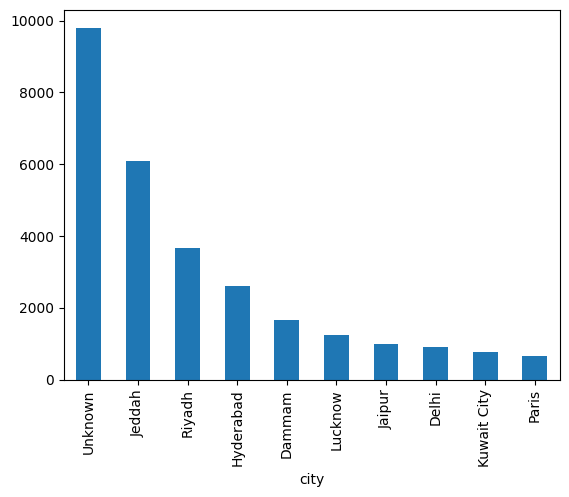

In [21]:
df['country'].value_counts().head(10).plot(kind='bar')
df['city'].value_counts().head(10).plot(kind='bar')


<Axes: xlabel='artist'>

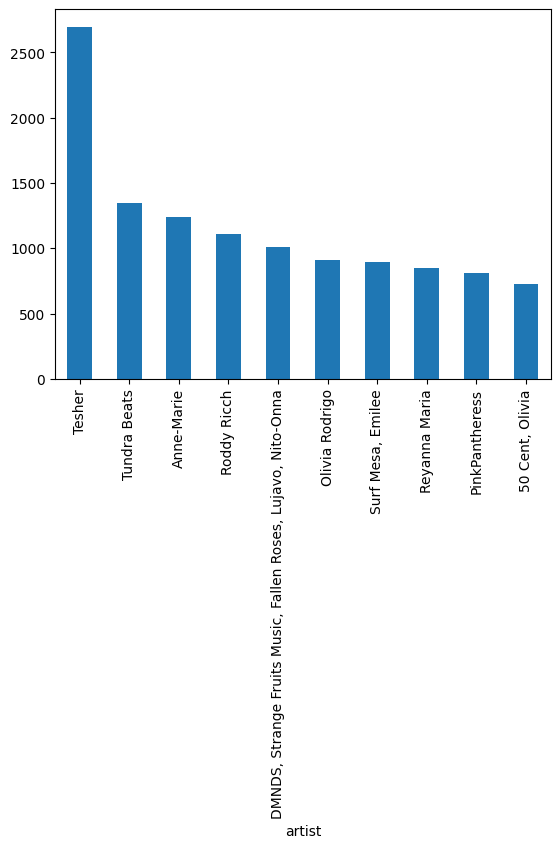

In [22]:
df['artist'].value_counts().head(10).plot(kind='bar')
